<a href="https://colab.research.google.com/github/a-essa/Python_for_data_analysis/blob/master/Projet_python_for_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

#Chargement des données, prétraitement et visualisation

## Chargelent des données

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00498/incident_event_log.zip')

In [3]:
df.shape

(141712, 36)

In [4]:
df

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141707,INC0120835,Closed,False,1,0,4,True,Caller 116,Opened by 12,16/2/2017 09:09,?,?,Updated by 27,16/2/2017 09:53,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,?,?,?,?,code 9,Resolved by 9,16/2/2017 09:53,16/2/2017 09:53
141708,INC0121064,Active,True,0,0,0,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 908,16/2/2017 14:17,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 10,False,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141709,INC0121064,Active,True,1,0,1,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 60,16/2/2017 15:20,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,?,False,False,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38
141710,INC0121064,Resolved,True,1,0,2,True,Caller 116,Opened by 12,16/2/2017 14:17,?,?,Updated by 27,16/2/2017 16:38,Email,Location 204,Category 42,Subcategory 223,Symptom 494,?,2 - Medium,2 - Medium,3 - Moderate,Group 31,Resolver 10,False,True,Do Not Notify,?,?,?,?,code 6,Resolved by 9,16/2/2017 16:38,16/2/2017 16:38


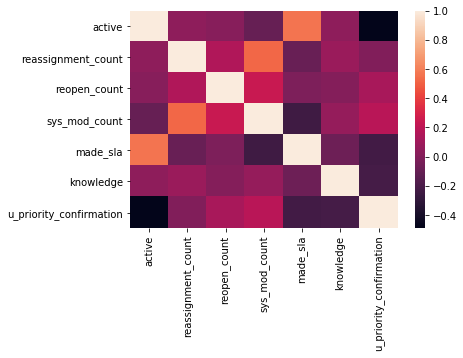

In [7]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

##Dimension & Visualisation des données

In [8]:
print(f'df_describe :\n {df.describe()}\n')
categorical = [col for col in df.columns if df[col].dtype==object]
numerical = [col for col in df.columns if df[col].dtype==int]
boolean = [col for col in df.columns if df[col].dtype==bool]
print(f'categorical colums : {categorical} \nlen_categorical : {len(categorical)}\n')
print(f'numericl columns : {numerical} \nlen_numerical : {len(numerical)}\n')
print(f'boolean columns : {boolean} \nlen_boolean : {len(boolean)}\n')

df_describe :
        reassignment_count   reopen_count  sys_mod_count
count       141712.000000  141712.000000  141712.000000
mean             1.104197       0.021918       5.080946
std              1.734673       0.207302       7.680652
min              0.000000       0.000000       0.000000
25%              0.000000       0.000000       1.000000
50%              1.000000       0.000000       3.000000
75%              1.000000       0.000000       6.000000
max             27.000000       8.000000     129.000000

categorical colums : ['number', 'incident_state', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by', 'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory', 'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to', 'notify', 'problem_id', 'rfc', 'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'] 
len_categorical : 29

numericl columns : ['reassignment_cou

                   features  uniques
0                    number    24918
1            incident_state        9
2                    active        2
3        reassignment_count       28
4              reopen_count        9
5             sys_mod_count      115
6                  made_sla        2
7                 caller_id     5245
8                 opened_by      208
9                 opened_at    19849
10           sys_created_by      186
11           sys_created_at    11553
12           sys_updated_by      846
13           sys_updated_at    50664
14             contact_type        5
15                 location      225
16                 category       59
17              subcategory      255
18                u_symptom      526
19                  cmdb_ci       51
20                   impact        3
21                  urgency        3
22                 priority        4
23         assignment_group       79
24              assigned_to      235
25                knowledge        2
2

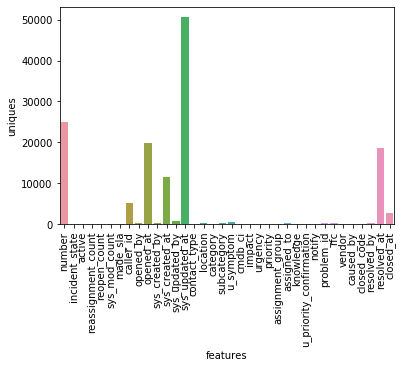

In [9]:
#Check the unique values
X = df.copy()
import seaborn as sns
nu = X.nunique().reset_index()
nu.columns = ['features', 'uniques']
ax = sns.barplot(x='features', y='uniques', data=nu)
ax.tick_params(axis='x', rotation=90)
print(nu)

# Pretraitement et Feature engineering 

###Data normalisation

In [10]:
'''# replace (original value) by (original value)/(maximum value)
df['reassignment_count'] = df['reassignment_count']/df['reassignment_count'].max()
df['reopen_count'] = df['reopen_count']/df['reopen_count'].max()
df['sys_mod_count'] = df['sys_mod_count']/df['sys_mod_count'].max()'''

"# replace (original value) by (original value)/(maximum value)\ndf['reassignment_count'] = df['reassignment_count']/df['reassignment_count'].max()\ndf['reopen_count'] = df['reopen_count']/df['reopen_count'].max()\ndf['sys_mod_count'] = df['sys_mod_count']/df['sys_mod_count'].max()"

###Identifier et traiter les valeurs manquantes

In [0]:
df.replace("?", np.nan, inplace = True)

In [12]:
# Get null values and dataframe information
print('Nan Values In DataFrame: {}\n'.format(df.isna().sum().sum()))

Nan Values In DataFrame: 894597



In [13]:
# Get null values and dataframe information
print('Nan Values In DataFrame: {}\n'.format(df.isna().sum()))

Nan Values In DataFrame: number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                   32964
cmdb_ci                    141267
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 27496
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id             

In [0]:
missing_data = df.isnull()

In [15]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

number
False    141712
Name: number, dtype: int64

incident_state
False    141712
Name: incident_state, dtype: int64

active
False    141712
Name: active, dtype: int64

reassignment_count
False    141712
Name: reassignment_count, dtype: int64

reopen_count
False    141712
Name: reopen_count, dtype: int64

sys_mod_count
False    141712
Name: sys_mod_count, dtype: int64

made_sla
False    141712
Name: made_sla, dtype: int64

caller_id
False    141683
True         29
Name: caller_id, dtype: int64

opened_by
False    136877
True       4835
Name: opened_by, dtype: int64

opened_at
False    141712
Name: opened_at, dtype: int64

sys_created_by
False    88636
True     53076
Name: sys_created_by, dtype: int64

sys_created_at
False    88636
True     53076
Name: sys_created_at, dtype: int64

sys_updated_by
False    141712
Name: sys_updated_by, dtype: int64

sys_updated_at
False    141712
Name: sys_updated_at, dtype: int64

contact_type
False    141712
Name: contact_type, dtype: int64

location
Fa

In [0]:
df[["caller_id"]] = df[["caller_id"]].astype("str")
df["caller_id"].replace(np.nan, "nan", inplace=True) # 29 nan

df[["opened_by"]] = df[["opened_by"]].astype("str")
df["opened_by"].replace(np.nan, "nan", inplace=True) # 4835 nan

df[["sys_created_by"]] = df[["sys_created_by"]].astype("str")
df["sys_created_by"].replace(np.nan, "nan", inplace=True) # 53076 nan

df[["sys_created_at"]] = df[["sys_created_at"]].astype("str")
df["sys_created_at"].replace(np.nan, "nan", inplace=True) # 53076 nan

df[["location"]] = df[["location"]].astype("str")
df["location"].replace(np.nan, "nan", inplace=True) # 76 nan

df[["category"]] = df[["category"]].astype("str")
df["category"].replace(np.nan, "nan", inplace=True) # 78 nan

df[["subcategory"]] = df[["subcategory"]].astype("str")
df["subcategory"].replace(np.nan, "nan", inplace=True) # 111 nan

df[["u_symptom"]] = df[["u_symptom"]].astype("str")
df["u_symptom"].replace(np.nan, "nan", inplace=True) # 32964 nan

df[["cmdb_ci"]] = df[["cmdb_ci"]].astype("str")
df["cmdb_ci"].replace(np.nan, "nan", inplace=True) # 445 nan

df[["assignment_group"]] = df[["assignment_group"]].astype("str")
df["assignment_group"].replace(np.nan, "nan", inplace=True) # 14213 nan

df['assigned_to'] = df['assigned_to'].astype("str")
df["assigned_to"].replace(np.nan, "nan", inplace=True) # 14213 nan

df[["problem_id"]] = df[["problem_id"]].astype("str")
df["problem_id"].replace(np.nan, "nan", inplace=True) # 2295 nan

df[["rfc"]] = df[["rfc"]].astype("str")
df["rfc"].replace(np.nan, "nan", inplace=True) # 991 nan

df[["vendor"]] = df[["vendor"]].astype("str")
df["vendor"].replace(np.nan, "nan", inplace=True) # 244 nan

df[["caused_by"]] = df[["caused_by"]].astype("str")
df["caused_by"].replace(np.nan, "nan", inplace=True) # 23 nan

df[["closed_code"]] = df[["closed_code"]].astype("str")
df["closed_code"].replace(np.nan, "nan", inplace=True) # 714 nan

df[["resolved_by"]] = df[["resolved_by"]].astype("str")
df["resolved_by"].replace(np.nan, "nan", inplace=True) # 226 nan

df[["resolved_at"]] = df[["resolved_at"]].astype("str") # Date
df["resolved_at"].replace(np.nan, "nan", inplace=True) # 3141 nan

In [17]:
# Get null values and dataframe information
print('Nan Values In DataFrame: {}\n'.format(df.isna().sum().sum()))

Nan Values In DataFrame: 0



### Feature engineering 

#### Creation jour, mois et annees

In [0]:
train = df.copy()

In [0]:
def to_weekday(weekday_conv):
  weekDays = ("Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche")
  return weekDays[weekday_conv]

In [0]:
def to_month(months_conv):
  months = ("Janvier","Fevrier","Mars","Avril","Mai","Juin","Juillet","Aout","Septembre","octobre","novembre","decembre")
  return months[months_conv-1]

In [0]:
def _add_date_features(df , variable):
  df[variable] = df[variable].astype(str)
  df[variable] = pd.to_datetime(df[variable], dayfirst=True)
  
  at_year = variable + "_year"
  at_month = variable + "_month"
  at_day = variable + "_day"
  at_weekday = variable + "_weekday"
  at_hour = variable + "_hour"


  df[at_year]   = df[variable].dt.year
  df[at_month]   = df[variable].dt.month
  df[at_day]     = df[variable].dt.day
  df[at_weekday] = df[variable].dt.weekday
  df[at_hour] = df[variable].dt.hour

  df[at_weekday] = df[at_weekday].apply(lambda x : to_weekday(x))
  df[at_month]   = df[at_month].apply(lambda x : to_month(x))

  return df 

In [0]:
train = _add_date_features(train,'opened_at')
#train = _add_date_features(train,'sys_created_at')
train = _add_date_features(train,'sys_updated_at')
train = _add_date_features(train,'closed_at')

####Creation temps restant

In [0]:
#train['delay'] = train['closed_at']-train['opened_at']

In [0]:
train['delay'] = train['closed_at']-train['sys_updated_at']

In [0]:
def delay_to_hours(date):
  days = date.days
  hours, remainder = divmod(date.seconds, 3600)
  minutes, seconds = divmod(remainder, 60)
  return days*24+hours+minutes/60

In [0]:
train['delay']=train['delay'].apply(lambda x : delay_to_hours(x))

In [0]:
train['delay']=np.log(train['delay']+1)

####"impact"	"urgency"	"priority" a int car une relation d'ordre existe

In [0]:
train['impact'] = train['impact'].apply(lambda x : int(x[0]))
train['urgency'] = train['urgency'].apply(lambda x : int(x[0]))
train['priority'] = train['priority'].apply(lambda x : int(x[0]))

#### Dummies pour les colonnes a plusieur categories car as.factors n'existe pas en python

In [0]:
def _add_column_dummies(df , variable):
  dummy_variable_1 = pd.get_dummies(df[variable])
  df = df.drop([variable], axis=1)
  df = pd.concat([df, dummy_variable_1], axis=1)
  return df 

In [0]:
#train = _add_column_dummies(train , "incident_state")
train = _add_column_dummies(train , "contact_type")
train = _add_column_dummies(train , "cmdb_ci")
train = _add_column_dummies(train , "vendor")
train = _add_column_dummies(train , "caused_by")

In [0]:
train = _add_column_dummies(train , "opened_by")
train = _add_column_dummies(train , "sys_created_by")
train = _add_column_dummies(train , "sys_updated_by")
train = _add_column_dummies(train , "location")
train = _add_column_dummies(train , "category")
train = _add_column_dummies(train , "subcategory")
train = _add_column_dummies(train , "u_symptom")
train = _add_column_dummies(train , "assignment_group")
train = _add_column_dummies(train , "assigned_to")
train = _add_column_dummies(train , "problem_id")
train = _add_column_dummies(train , "rfc")

In [0]:
train = _add_column_dummies(train , "opened_at_month")
train = _add_column_dummies(train , "opened_at_weekday")
train = _add_column_dummies(train , "sys_updated_at_month")
train = _add_column_dummies(train , "sys_updated_at_weekday")

In [0]:
#train = train.drop(['opened_by', 'sys_created_by', 'sys_updated_by','location', 'category','subcategory','u_symptom','assignment_group','assigned_to','problem_id','rfc'], axis=1)

#### Les features avec 2 classes vers code bineaire 

In [0]:
train['made_sla']=train['made_sla'].apply(lambda x : int(x == True))
train['knowledge']=train['knowledge'].apply(lambda x : int(x == True))
train['u_priority_confirmation']=train['u_priority_confirmation'].apply(lambda x : int(x == True))
train['notify']=train['notify'].apply(lambda x : int(x == 'Send Email'))

####Supression des colonnes qui donne le resultat

In [0]:
train = train.drop(['closed_at', 'resolved_at', 'opened_at','sys_created_at', 'sys_updated_at','number','caller_id','closed_code','resolved_by','incident_state','active','closed_at_year','closed_at_month','closed_at_day','closed_at_weekday','closed_at_hour'], axis=1)

In [0]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Split train et test set

In [0]:
y = train['delay'].copy()
X = train.drop(['delay'], axis=1).copy()

In [0]:
nb_sep = int(141712*0.8)
X_train = X.iloc[0:nb_sep]
X_test = X.iloc[nb_sep : 141712]
Y_train = y.iloc[0:nb_sep]
Y_test = y.iloc[nb_sep : 141712]

# Model

### Entrainement ML

#### Regression

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
reg = LinearRegression().fit(X_train, Y_train)

In [57]:
reg.score(X_train, Y_train)

0.7979243543612952

In [58]:
reg.coef_

array([-1.397e-02,  3.812e-01,  1.707e-03, ..., -4.650e+10, -4.650e+10,
       -4.650e+10])

In [59]:
reg.intercept_

15951298242047.36

In [60]:
mean_squared_error(Y_test, reg.predict(X_test))

7.795800282709002e+19

#### Decision tree

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(criterion='mse', max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10)
#regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [66]:
mean_squared_error(Y_test, regressor.predict(X_test))

0.3876836062930299

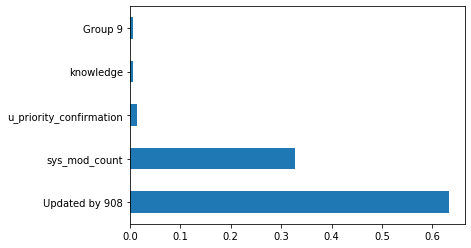

In [75]:
importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
importances.nlargest(5).plot(kind='barh')

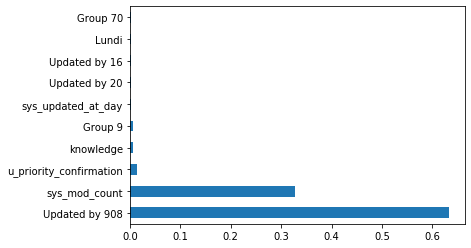

In [76]:
importances = pd.Series(regressor.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')

#### Random forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
regrRF = RandomForestRegressor(max_depth=10, random_state=0)
regrRF.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [63]:
mean_squared_error(Y_test, regrRF.predict(X_test))

0.36695100031202366

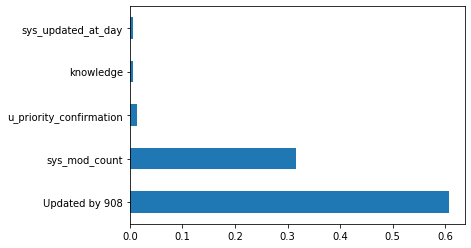

In [77]:
importances = pd.Series(regrRF.feature_importances_, index=X_train.columns)
importances.nlargest(5).plot(kind='barh')

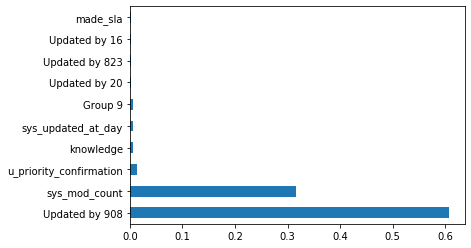

In [78]:
importances = pd.Series(regrRF.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')

#### Gradient boosting

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gradientBoostRegressor = GradientBoostingRegressor(random_state=1, n_estimators=150)
gradientBoostRegressor.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
mean_squared_error(Y_test, gradientBoostRegressor.predict(X_test))

0.38981212415964334

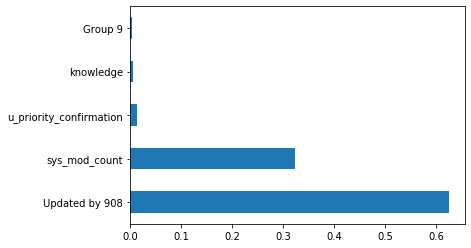

In [80]:
importances = pd.Series(gradientBoostRegressor.feature_importances_, index=X_train.columns)
importances.nlargest(5).plot(kind='barh')

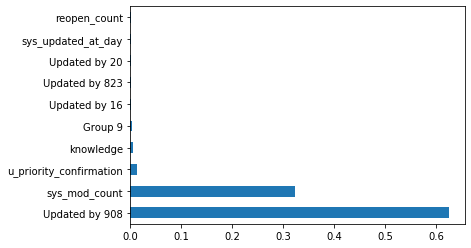

In [79]:
importances = pd.Series(gradientBoostRegressor.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')

### Entrainement DL

In [37]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import io
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
tf.keras.backend.clear_session()
np.set_printoptions(precision=3, suppress=True)
pd.options.display.max_colwidth = 1000
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
DenseLayer1 = tf.keras.layers.Dense(3174)

DenseLayer2 = tf.keras.layers.Dense(1500, activation='relu')

DenseLayer3 = tf.keras.layers.Dense(750, activation='relu')

DenseLayer4 = tf.keras.layers.Dense(300, activation='relu')

DenseLayer5 = tf.keras.layers.Dense(150, activation='relu')

DenseLayer6 = tf.keras.layers.Dense(64, activation='relu')

DenseLayer7 = tf.keras.layers.Dense(32, activation='relu')

DenseLayer8 = tf.keras.layers.Dense(1)

In [0]:
model = tf.keras.Sequential()
model.add(DenseLayer1)
model.add(DenseLayer2)
model.add(DenseLayer3)
model.add(DenseLayer4)
model.add(DenseLayer5)
model.add(DenseLayer6)
model.add(DenseLayer7)
model.add(DenseLayer8)

In [0]:
model.compile(loss='mean_squared_error',# . mean_absolute_error
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mse','mae'])

In [42]:
history = model.fit(np.array(X_train), #3174
                    np.array(Y_train),
                    epochs=100,
                    batch_size=100,
                    validation_data=(np.array(X_test), np.array(Y_test)),
                    verbose=1)

Train on 113369 samples, validate on 28343 samples
Epoch 1/100
113369/113369 [==============================] - 10s 92us/sample - loss: 40.6877 - mse: 40.6877 - mae: 2.4833 - val_loss: 4.0620 - val_mse: 4.0620 - val_mae: 1.2089
Epoch 2/100
113369/113369 [==============================] - 8s 68us/sample - loss: 2.7200 - mse: 2.7200 - mae: 1.2347 - val_loss: 1.6921 - val_mse: 1.6921 - val_mae: 0.9978
Epoch 3/100
113369/113369 [==============================] - 8s 67us/sample - loss: 1.1393 - mse: 1.1393 - mae: 0.7529 - val_loss: 1.7240 - val_mse: 1.7240 - val_mae: 0.9720
Epoch 4/100
113369/113369 [==============================] - 8s 67us/sample - loss: 0.9955 - mse: 0.9955 - mae: 0.6583 - val_loss: 0.7313 - val_mse: 0.7313 - val_mae: 0.5037
Epoch 5/100
113369/113369 [==============================] - 8s 67us/sample - loss: 166.1049 - mse: 166.1049 - mae: 2.6301 - val_loss: 2.8307 - val_mse: 2.8307 - val_mae: 1.2811
Epoch 6/100
113369/113369 [==============================] - 8s 67us/sam

val_mse: 0.4689 - val_mae: 0.3847

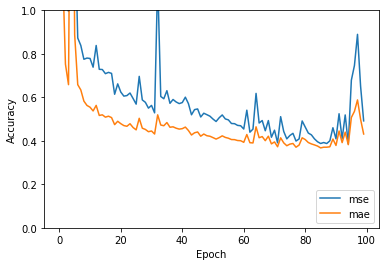

In [86]:
plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['mae'], label = 'mae')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')